# Analysis DATA

In [1]:
from utilities import *

raw_data = pd.read_excel("data/Datos_Market_copy.xlsx")

sa = SalesAnalysis(raw_data)

data = sa.data

/Users/oscarjimenezbou/Documents/TFG_ADE/code/utilities.py:704: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["brand"].replace({i: "other"}, inplace=True)
/Users/oscarjimenezbou/Documents/TFG_ADE/code/utilities.py:751: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(
/Users/oscarjimenezbou/Documents/TFG_ADE/code/utilities.py:751: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(
/Users/oscarjimene

#### ARIMA

/Users/oscarjimenezbou/Documents/TFG_ADE/code/utilities.py:394: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered_by_brand.rename(


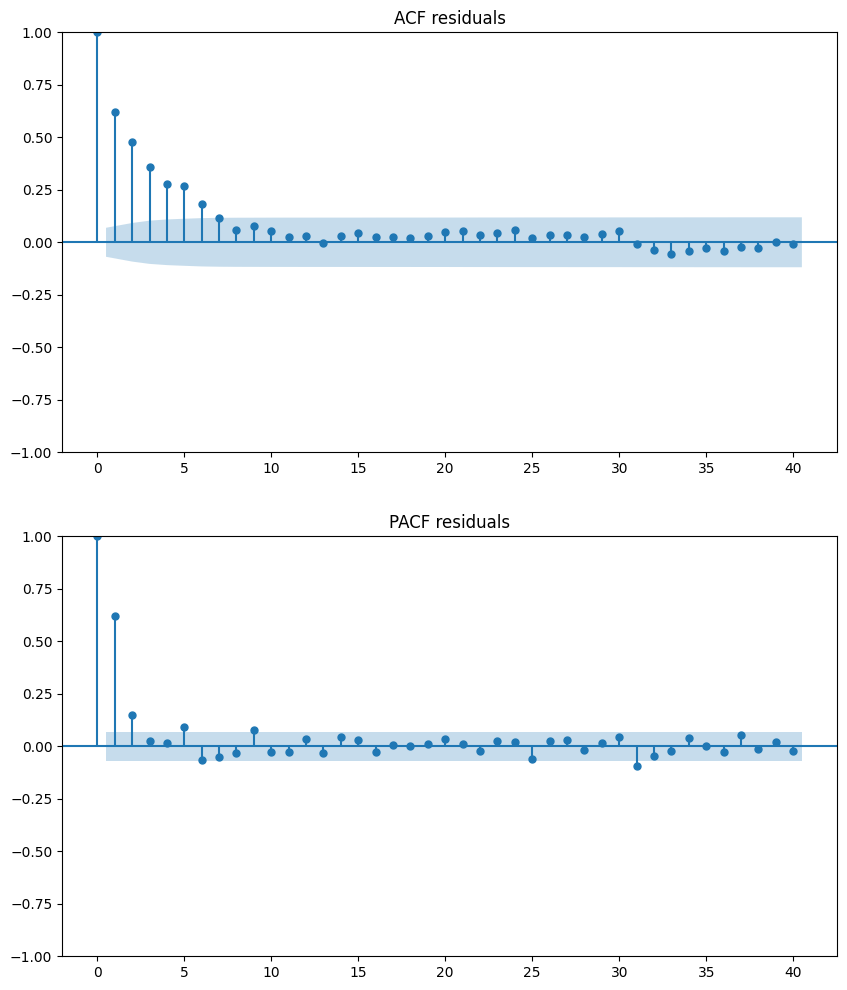

'It need a differation'

In [11]:
####MODELIZATION
model_brand35 = sa.modelization(
    data[sa.brand35], sa.__interactions_delected_brand35__()
)
model_brand35.summary()

####RESIDUALS
sa.plot_resid_ACF_PACF(model_brand35.resid, lags=40)

"""It need a differation"""

/Users/oscarjimenezbou/Documents/TFG_ADE/code/tfg/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/oscarjimenezbou/Documents/TFG_ADE/code/tfg/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/oscarjimenezbou/Documents/TFG_ADE/code/tfg/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


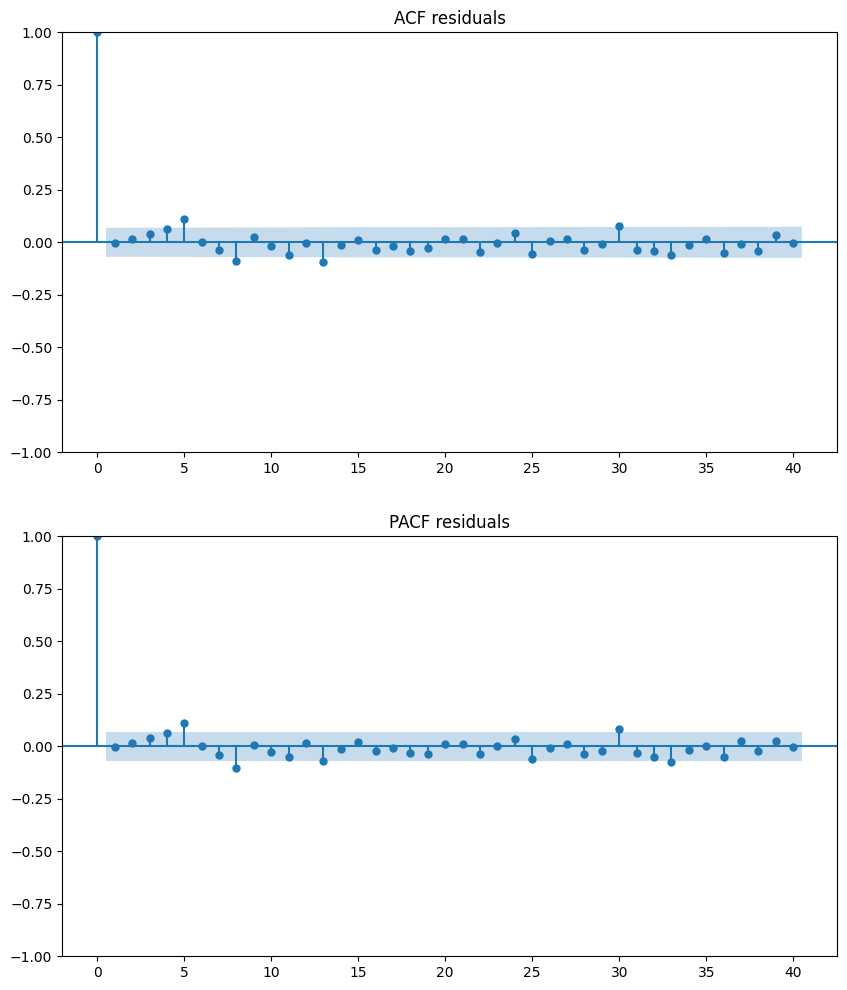

,lb_stat,lb_pvalue
10,22.985608,0.0108


In [3]:
####ARIMA
possible_models = {
    "1": (0, 1, 5),
    "2": (0, 1, 4),
    "3": (0, 1, 3),
    "4": (0, 1, 2),
    "5": (0, 1, 1),
    "6": (4, 1, 0),
    "7": (3, 1, 0),
    "8": (2, 1, 0),
    "9": (1, 1, 0),
    "10": (1, 1, 1),
}

model_arima = sa.ARIMA(
    residues=model_brand35.resid,
    model_chosen=(possible_models["1"]),
    diff_need_for_residues=True,
)

### TEST for autocorrelation in residuals of ARIMA /// anyways with graphs can be seen
sa.test_correlation_residues(model_arima.resid)

#### ARIMAX


/Users/oscarjimenezbou/Documents/TFG_ADE/code/tfg/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/oscarjimenezbou/Documents/TFG_ADE/code/tfg/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/oscarjimenezbou/Documents/TFG_ADE/code/tfg/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


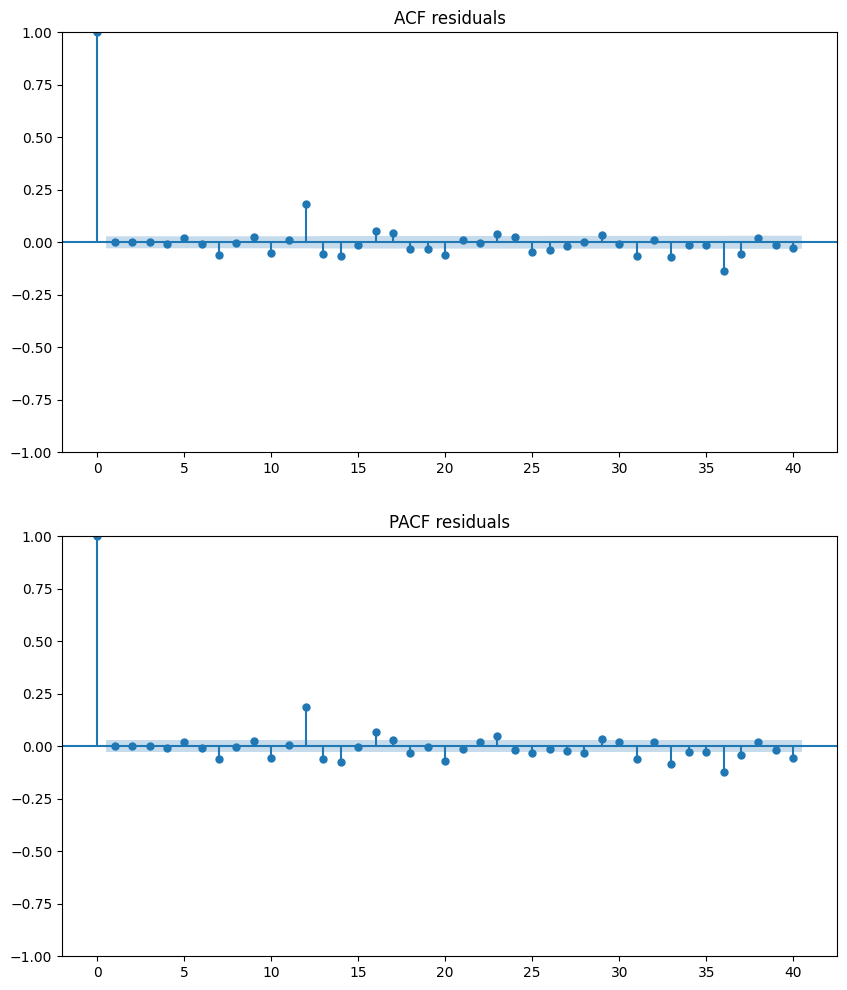

,lb_stat,lb_pvalue
10,36.517054,0.000069


In [10]:
model_arimax = sa.ARIMAX(
    data["volume.sales"], data["unit.sales"], model_chosen=(0, 1, 5)
)
model_arimax.summary()

sa.test_correlation_residues(model_arimax.resid)